In [75]:
import numpy as np 
import time
import matplotlib.pyplot as plt

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.providers.models import QasmBackendConfiguration
from qiskit.providers import BaseBackend

In [13]:
def entCX(qc,i):
    for l in range(i-1):
        qc.cx(l,l+1)

def RxRy(qc,i):
    for l in range(i):
        qc.rx(np.pi/3,l)
        qc.ry(np.pi/5,l)

In [54]:
def test(i,j):
    qc=QuantumCircuit(i,i)
    for k in range (j):
        ent(qc,i)
        RxRy(qc,i)
    qc.measure_all
    return qc

In [72]:
def bench(simulator):
    i=2
    j=2
    depth=[]
    for i in range(2,20):
        duration=0
        while (duration<0.50) and j<101:
            test_qc=test(i,j)
            start_time = time.time()
            execute(test_qc, simulator, shots=1000)
            duration=(time.time() - start_time)
            j=j+1
        depth.append(j-1)
        j=2
    return depth

def scor(depth):
    sc=0
    i=2
    for x in depth:
        sc=sc+depth*i
        i=i+1
    return sc

In [55]:
i=3
j=3
qc=test(i,j)
qc.draw()

┌──────────┐┌──────────┐                 ┌──────────┐┌──────────┐»
q_0: ──■──┤ RX(pi/3) ├┤ RY(pi/5) ├──────────────■──┤ RX(pi/3) ├┤ RY(pi/5) ├»
     ┌─┴─┐└──────────┘├──────────┤┌──────────┐┌─┴─┐└──────────┘├──────────┤»
q_1: ┤ X ├─────■──────┤ RX(pi/3) ├┤ RY(pi/5) ├┤ X ├─────■──────┤ RX(pi/3) ├»
     └───┘   ┌─┴─┐    ├──────────┤├──────────┤└───┘   ┌─┴─┐    ├──────────┤»
q_2: ────────┤ X ├────┤ RX(pi/3) ├┤ RY(pi/5) ├────────┤ X ├────┤ RX(pi/3) ├»
             └───┘    └──────────┘└──────────┘        └───┘    └──────────┘»
c_0: ══════════════════════════════════════════════════════════════════════»
                                                                           »
c_1: ══════════════════════════════════════════════════════════════════════»
                                                                           »
c_2: ══════════════════════════════════════════════════════════════════════»
                                                                           »
«                      ┌──────────┐┌──────────┐            
«q_0: ──────────────■──┤ RX(pi/3) ├┤ RY(pi/5) ├────────────
«     ┌──────────┐┌─┴─┐└──────────┘├──────────┤┌──────────┐
«q_1: ┤ RY(pi/5) ├┤ X ├─────■──────┤ RX(pi/3) ├┤ RY(pi/5) ├
«     ├──────────┤└───┘   ┌─┴─┐    ├──────────┤├──────────┤
«q_2: ┤ RY(pi/5) ├────────┤ X ├────┤ RX(pi/3) ├┤ RY(pi/5) ├
«     └──────────┘        └───┘    └──────────┘└──────────┘
«c_0: ═════════════════════════════════════════════════════
«                                                          
«c_1: ═════════════════════════════════════════════════════
«                                                          
«c_2: ═════════════════════════════════════════════════════
«

In [6]:
start_time = time.time()

duration=(time.time() - start_time)

--- 3.0 seconds ---


In [96]:
simulator=Aer.get_backend('qasm_simulator')
depth=bench(simulator)
print(depth)

[95, 75, 63, 51, 25, 39, 21, 31, 23, 24, 23, 22, 18, 16, 16, 15, 11, 13]


In [98]:
def scor(depth):
    sc=0
    i=2
    for x in depth:
        sc=sc+depth*i
        i=i+1
    return sc

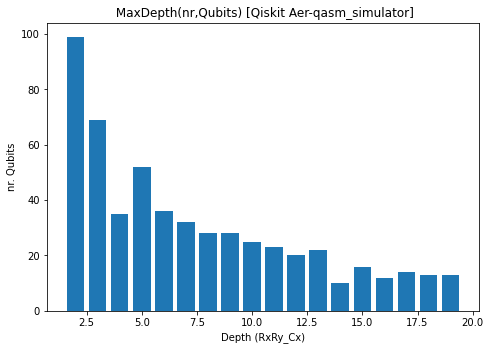

In [97]:
simulator_name='Qiskit Aer-qasm_simulator'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(2,20)]
depth = depth
ax.bar(langs,students)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name+']')
ax.set_ylabel('nr. Qubits')
ax.set_xlabel('Depth (RxRy_Cx)')
plt.show()

NameError: name &#39;pubits&#39; is not defined